<a href="https://colab.research.google.com/github/Jessy0786/Mujeres-Digitales-Jessy/blob/main/Taller_Semana_4_Jessy_Corregido(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigando los accidentes de tránsito en Nueva York

# **Taller 4 Jesyca Maria Patiño Londoño**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Introducción

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las vías de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como comuna, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema empresarial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV que contiene detalles sobre cada accidente como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

*    Leer, transformar y preparar datos para su visualización
*    Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1.    ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo? Los accidentes disminuyeron, tal y como indica la grafica
2.   Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes? A las 16 y 17 Horas
3.    ¿Hay más accidentes entre semana que los fines de semana? Entre semana hay mas accidentes
4.    ¿Cuál es la proporción de accidentes por área por comuna? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
**a**
* BRONX :             895
* BROOKLYN :         1076
* MANHATTAN :        2135
* QUEENS :            618
* STATEN ISLAND :     148

**b**
* Manhattan tiene muchos accidentes con respecto al area que ocupa
5.    Para cada comuna, ¿durante qué horas es más probable que ocurran accidentes?
* BRONX            16 (Hora)         2952 (Numero de accidentes)
* BROOKLYN         16 (Hora)         5701 (Numero de accidentes)
* MANHATTAN        14 (Hora)         3375 (Numero de accidentes)
* QUEENS           17 (Hora)         5104 (Numero de accidentes)
* STATEN ISLAND    16 (Hora)          775 (Numero de accidentes)
6.    ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
Se omitio : Unspecified
* Driver Inattention/Distraction                            72203.0
* Failure to Yield Right-of-Way                             20413.0
* Following Too Closely                                     17909.0
* Backing Unsafely                                          15068.0
* Passing Too Closely                                       13378.0

In [2]:
# Use la siguiente informacipón de cada comuna ("borough") para realizar los análisis

borough_data = {'bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}

Tenemos las siguientes columnas

     Borough: el comuna en el que ocurrió el accidente.
     COLLISION_ID: un identificador único para esta colisión
     CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): Motivos del accidente
     CROSS STREET : Calle transversal más cercana al lugar de los accidentes
     DATE: Fecha del accidente
     TIME: Hora del accidente
     DATETIME: la columna que creamos anteriormente con la combinación de fecha y hora
     LATITUDE: Latitud del accidente
     LONGITUDE: Longitud del accidente
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) INJURED: Lesión por categoría
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) KILLED: Categoría muerte sabia
     ON STREET NAME: Calle donde ocurrió el accidente
     TOTAL INJURED: Total de heridos por el accidente
     TOTAL KILLED: Total de bajas en el accidente
     VEHICLE TYPE CODE (1, 2, 3, 4, 5): Tipos de vehículos involucrados en el accidente
     ZIP CODE: código postal del lugar del accidente

Primero cargue los datos del csv a un dataframe.

**Nota:** El archivo se encuentra separado por punto y coma ( ; ) en lugar de coma ( , ), así que se debe ingresar el parámetro sep para leer el archivo. Aquí puede encontrar información:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
# Escriba su código aquí
#df = pd.read_csv('accidents_sample.csv', sep= ';')
df = pd.read_csv('/content/sample_data/accidents_sample.csv', sep= ';')
pd.options.display.max_columns = 5
print(df)

             DATE   TIME  ... VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5
0      05/29/2019   8:19  ...                 NaN                  NaN
1      05/11/2018  16:30  ...                 NaN                  NaN
2      07/18/2019  12:51  ...                 NaN                  NaN
3      07/06/2019  15:00  ...                 NaN                  NaN
4      07/14/2018  23:26  ...                 NaN                  NaN
...           ...    ...  ...                 ...                  ...
47699  06/02/2018   0:15  ...                 NaN                  NaN
47700  06/04/2019   6:30  ...                 NaN                  NaN
47701  05/03/2019  15:46  ...                 NaN                  NaN
47702  01/24/2018  19:05  ...                 NaN                  NaN
47703  09/23/2018  17:28  ...                 NaN                  NaN

[47704 rows x 24 columns]


## Parte 1: Accidentes a lo largo del tiempo

Agrupe los datos disponibles mensualmente y genere una gráfica lineal de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

DATE
2018-01    2406
2018-02    2110
2018-03    2469
2018-04    2317
2018-05    2658
2018-06    2669
2018-07    2453
2018-08    2556
2018-09    2494
2018-10    2654
2018-11    2470
2018-12    2461
2019-01    2170
2019-02    2102
2019-03    2258
2019-04    2196
2019-05    2562
2019-06    2583
2019-07    2422
2019-08    1694
Freq: M, Name: DATE, dtype: int64


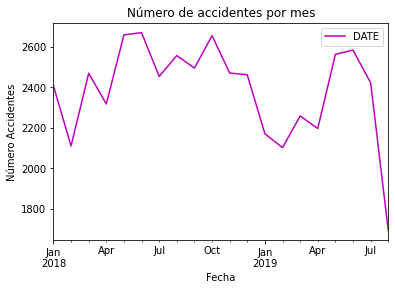

In [4]:
# Numero de accidentes a lo largo del tiempo
dfg_mes = df['DATE']
dfg_mes= dfg_mes.groupby(pd.PeriodIndex(df['DATE'], freq='M')).count()
print(dfg_mes)
dfg_mes.plot(kind='line',color='m');
plt.ylabel("Número Accidentes")
plt.xlabel("Fecha")
plt.title("Número de accidentes por mes")
plt.legend()
#Los accidentes disminuyeron

## Parte 2: Puntos calientes de accidentes en un día

¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna HORA basada en los datos de la columna DATETIME, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

No handles with labels found to put in legend.


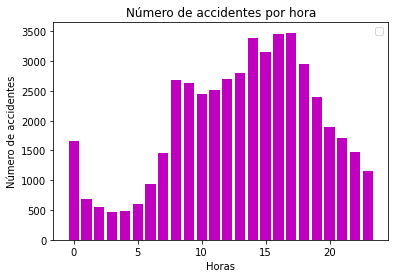

In [5]:
# Numero de accidentes distribuidos en un día
df['TIME'] = pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour
dfg_hour = df.groupby('HOUR').size()
plt.bar(dfg_hour.index, dfg_hour.values, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("Horas")
plt.title("Número de accidentes por hora")
plt.legend()

## Parte 3: Accidentes por día laborable

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

No handles with labels found to put in legend.


DATE
0    7020
1    7146
2    7090
3    7252
4    7565
5    6330
6    5301
dtype: int64


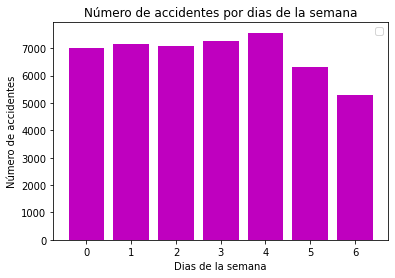

In [6]:
# Por dia de la semana
df['DATE'] = pd.to_datetime(df['DATE'])
dfg_wd= df.groupby(df['DATE'].dt.weekday).size()
plt.bar(dfg_wd.index, dfg_wd.values, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("Dias de la semana")
plt.title("Número de accidentes por dias de la semana")
plt.legend()
print(dfg_wd)

No handles with labels found to put in legend.


DATE
Friday       7565
Monday       7020
Saturday     6330
Sunday       5301
Thursday     7252
Tuesday      7146
Wednesday    7090
dtype: int64


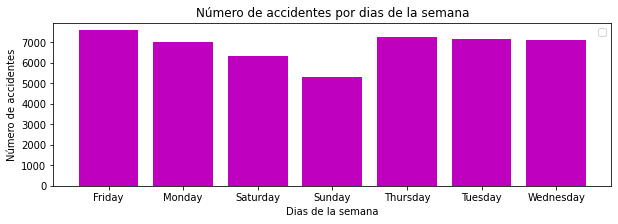

In [7]:
# Por nombre del dia de la semana
import calendar
df['DATE'] = pd.to_datetime(df['DATE'])
dfg_wd= df.groupby(df['DATE'].dt.day_name()).size()
plt.figure(figsize=(10, 3))
plt.bar(dfg_wd.index, dfg_wd.values, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("Dias de la semana")
plt.title("Número de accidentes por dias de la semana")
plt.legend()

print(dfg_wd)

## Parte 4: Análisis de comuna

Trace un gráfico de barras del número total de accidentes en cada comuna, así como uno de los accidentes por kilómetro cuadrado por comuna. ¿Qué puedes concluir?

No handles with labels found to put in legend.


BOROUGH
BRONX             7547
BROOKLYN         15248
MANHATTAN         9918
QUEENS           13173
STATEN ISLAND     1818
dtype: int64


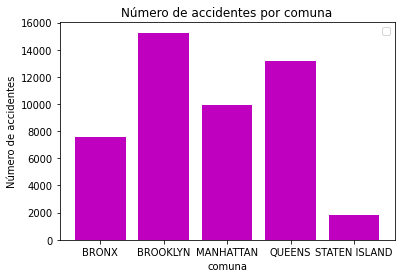

In [14]:
# Número de accidentes por comuna
dfg_c= df.groupby(df['BOROUGH']).size()
print(dfg_c)
plt.bar(dfg_c.index, dfg_c.values, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("comuna")
plt.title("Número de accidentes por comuna")
plt.legend()

No handles with labels found to put in legend.


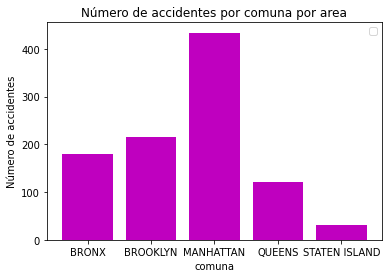

In [12]:
# Escriba su código aquí Número de accidentes por comuna por area
dfg_ca= df.groupby(df['BOROUGH']).size()

indexList = dfg_ca.index.tolist()
listValues = dfg_ca.values
index = 0
for key in indexList:
  key = str(key).lower()  
  listValues[index] = dfg_ca.values[index]/borough_data[key]['area']
  index = index + 1

plt.bar(dfg_ca.index, listValues, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("comuna")
plt.title("Número de accidentes por comuna por area")
plt.legend()



In [16]:
print(dfg_ca)

BOROUGH
BRONX            179
BROOKLYN         215
MANHATTAN        434
QUEENS           121
STATEN ISLAND     31
dtype: int64


In [15]:
mascara = df['BOROUGH'] == "BRONX"
df_bronx = df.loc[mascara, 'BOROUGH']
#df_bronx= df_bronx.groupby(df['BOROUGH']).size()
print(df_bronx.shape[0])
print(df_bronx.shape[0]/42.1)


7547
179.26365795724465


In [17]:
df

,DATE,TIME,...,VEHICLE TYPE CODE 5,HOUR
0,2019-05-29,2021-09-07 08:19:00,...,NaN,8
1,2018-05-11,2021-09-07 16:30:00,...,NaN,16
2,2019-07-18,2021-09-07 12:51:00,...,NaN,12
3,2019-07-06,2021-09-07 15:00:00,...,NaN,15
4,2018-07-14,2021-09-07 23:26:00,...,NaN,23
...,...,...,...,...,...
47699,2018-06-02,2021-09-07 00:15:00,...,NaN,0
47700,2019-06-04,2021-09-07 06:30:00,...,NaN,6
47701,2019-05-03,2021-09-07 15:46:00,...,NaN,15
47702,2018-01-24,2021-09-07 19:05:00,...,NaN,19


## Parte 5: Análisis por hora del comuna

¿Qué horas tienen más accidentes en cada comuna? Trace un gráfico de barras para cada comuna que muestre el número de accidentes por cada hora del día.

           BOROUGH  HOUR  NumAccidents
0            BRONX     0           262
1            BRONX     1           113
2            BRONX     2            95
3            BRONX     3            69
4            BRONX     4            77
..             ...   ...           ...
115  STATEN ISLAND    19            85
116  STATEN ISLAND    20            64
117  STATEN ISLAND    21            54
118  STATEN ISLAND    22            57
119  STATEN ISLAND    23            40

[120 rows x 3 columns]


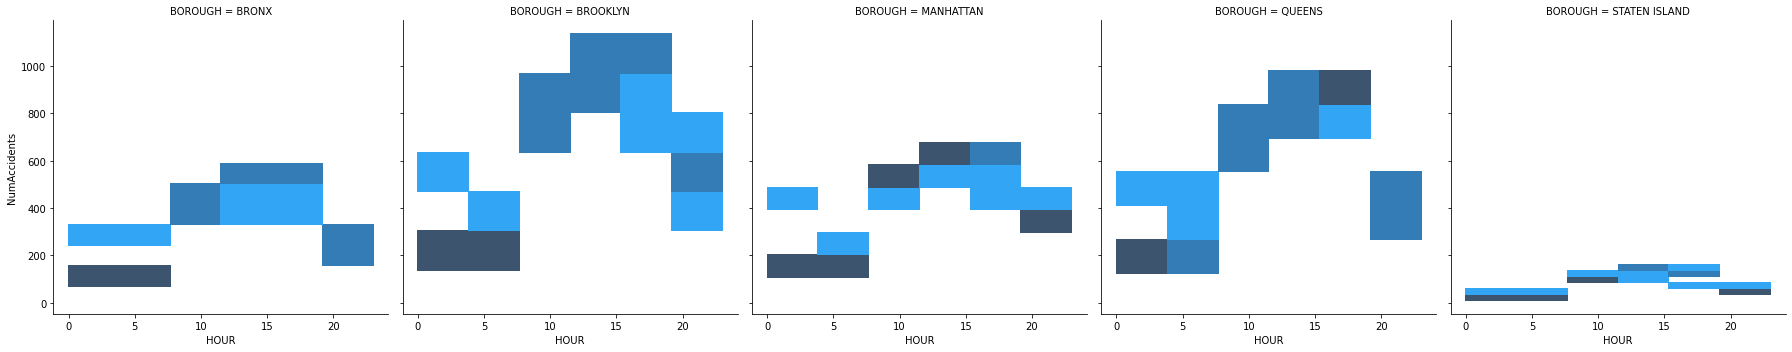

In [18]:
#g = sns.FacetGrid(churn, col='Attrition_Flag', height=4, aspect=1.2)
#g.map(sns.histplot, 'Customer_Age')

# Escriba su código aquí
df['TIME'] = pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour

dfg_Comuna_hour =df.groupby(['BOROUGH', 'HOUR'])['HOUR'].size().reset_index(name="NumAccidents")
print(dfg_Comuna_hour)

g = sns.FacetGrid(dfg_Comuna_hour, col='BOROUGH', height=5)
g.map(sns.histplot, 'HOUR', "NumAccidents")

#dfg_hour.index
#dfg_hour.values
#print(df['BOROUGH'].unique())
#g = sns.FacetGrid(dfg_hour, col=dfg_hour['BOROUGH'])
#g.map(sns.histplot, dfg_hour.values)


In [19]:
# Para ver los datos de los numeros de accidentes en un rango determinado
print(dfg_Comuna_hour.iloc[95:])

           BOROUGH  HOUR  NumAccidents
95          QUEENS    23           300
96   STATEN ISLAND     0            50
97   STATEN ISLAND     1            19
98   STATEN ISLAND     2            11
99   STATEN ISLAND     3            10
100  STATEN ISLAND     4            10
101  STATEN ISLAND     5            22
102  STATEN ISLAND     6            31
103  STATEN ISLAND     7            54
104  STATEN ISLAND     8           111
105  STATEN ISLAND     9            94
106  STATEN ISLAND    10            94
107  STATEN ISLAND    11            92
108  STATEN ISLAND    12           100
109  STATEN ISLAND    13           123
110  STATEN ISLAND    14           145
111  STATEN ISLAND    15           142
112  STATEN ISLAND    16           133
113  STATEN ISLAND    17           161
114  STATEN ISLAND    18           116
115  STATEN ISLAND    19            85
116  STATEN ISLAND    20            64
117  STATEN ISLAND    21            54
118  STATEN ISLAND    22            57
119  STATEN ISLAND    23 

## Parte 6: Causa de accidentes

¿Qué factores provocan la mayoría de los accidentes?

No handles with labels found to put in legend.


Index(['Unspecified', 'Driver Inattention/Distraction',
       'Failure to Yield Right-of-Way', 'Following Too Closely',
       'Backing Unsafely', 'Passing Too Closely',
       'Passing or Lane Usage Improper', 'Other Vehicular',
       'Turning Improperly', 'Unsafe Lane Changing',
       'Traffic Control Disregarded', 'Driver Inexperience', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Alcohol Involvement',
       'View Obstructed/Limited', 'Pavement Slippery', 'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Passenger Distraction', 'Aggressive Driving/Road Rage',
       'Brakes Defective', 'Outside Car Distraction', 'Glare', 'Fell Asleep',
       'Obstruction/Debris', 'Steering Failure', 'Pavement Defective',
       'Failure to Keep Right', 'Illnes', 'Driverless/Runaway Vehicle',
       'Fatigued/Drowsy', 'Tire Failure/Inadequate', 'Lost Consciousness',
       'Animals Action', 'Accelerator Defective',
       'Lane Marking Impr

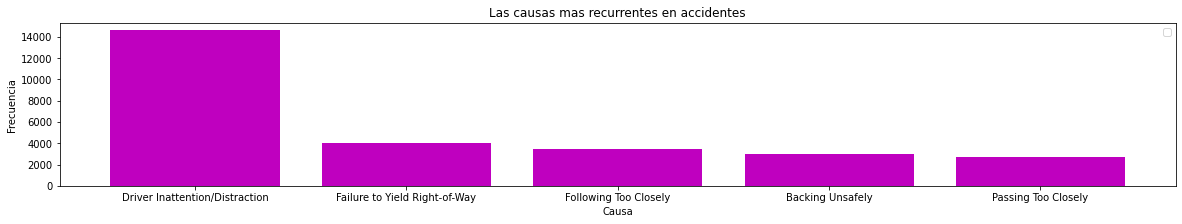

In [20]:
# Escriba su código aquí
#CONTRIBUTING FACTOR VEHICLE 1
#CONTRIBUTING FACTOR VEHICLE 2
#CONTRIBUTING FACTOR VEHICLE 3
#CONTRIBUTING FACTOR VEHICLE 4
#CONTRIBUTING FACTOR VEHICLE 5
#print(df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts())
pd_causa = pd.concat(
    [df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(), df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts(), df['CONTRIBUTING FACTOR VEHICLE 3'].value_counts(), df['CONTRIBUTING FACTOR VEHICLE 4'].value_counts(), df['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()], 
    axis=1
    ).sum(axis=1)
print(pd_causa.index)

pd_causa = pd_causa.iloc[1:6]

plt.figure(figsize=(20, 3))
plt.bar(pd_causa.index, pd_causa.values, color="m")
plt.ylabel("Frecuencia")
plt.xlabel("Causa")
plt.title("Las causas mas recurrentes en accidentes")
plt.legend()